**First upload the Train.zip and Test.**

Reference article:- https://towardsdatascience.com/recognizing-cats-and-dogs-with-tensorflow-105eb56da35f

In [ ]:
!unzip /content/Test.zip

In [ ]:
!unzip /content/Train.zip

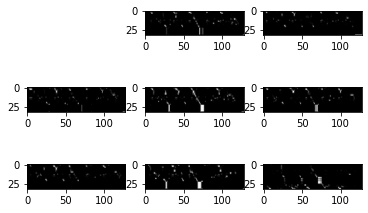

In [ ]:

# plot Class 1 dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'Train/class1/'
# plot first few images

for i in range(1,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + str(i) + '.bmp'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

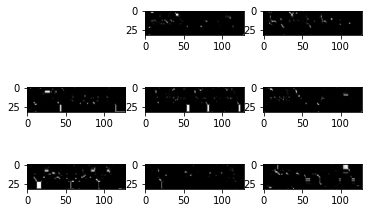

In [ ]:
# plot Class 2 dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'Train/class2/'
# plot first few images

for i in range(1,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + str(i) + '.bmp'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    brightness_range=[0.4,1.5],
    shear_range=0.2,
    zoom_range=0.3,
    validation_split=0.25)

In [ ]:
train_iterator = train_datagen.flow_from_directory(
    '/content/Train',
    target_size=(128,32),
    batch_size=16,
    class_mode="binary",
    shuffle=True,
    subset='training')

Found 11026 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    brightness_range=[0.4,1.5],
    shear_range=0.2,
    zoom_range=0.3,
    validation_split=0.25)

In [ ]:
valid_iterator = val_datagen.flow_from_directory(
    '/content/Train', # same directory as training data
    target_size=(128,32),
    batch_size=16,
    class_mode='binary',
    shuffle=True,
    subset='validation') # set as validation data

Found 3674 images belonging to 2 classes.


In [ ]:
train_iterator.image_shape

(128, 32, 3)

In [ ]:
valid_iterator.image_shape

(128, 32, 3)

11760 + 2940 = 14700 (total number of pics) ---0.2 valid

11026 + 3674 = 14700 ---- 0.25 valid

In [ ]:
import keras
model = keras.Sequential([
    keras.layers.Conv2D(40, (5, 5), activation='tanh', input_shape=(128, 32, 3)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(30, (3, 3), activation='tanh'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(50, (2, 2), activation='tanh'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='tanh'),
    keras.layers.Dense(2, activation='softmax')
])

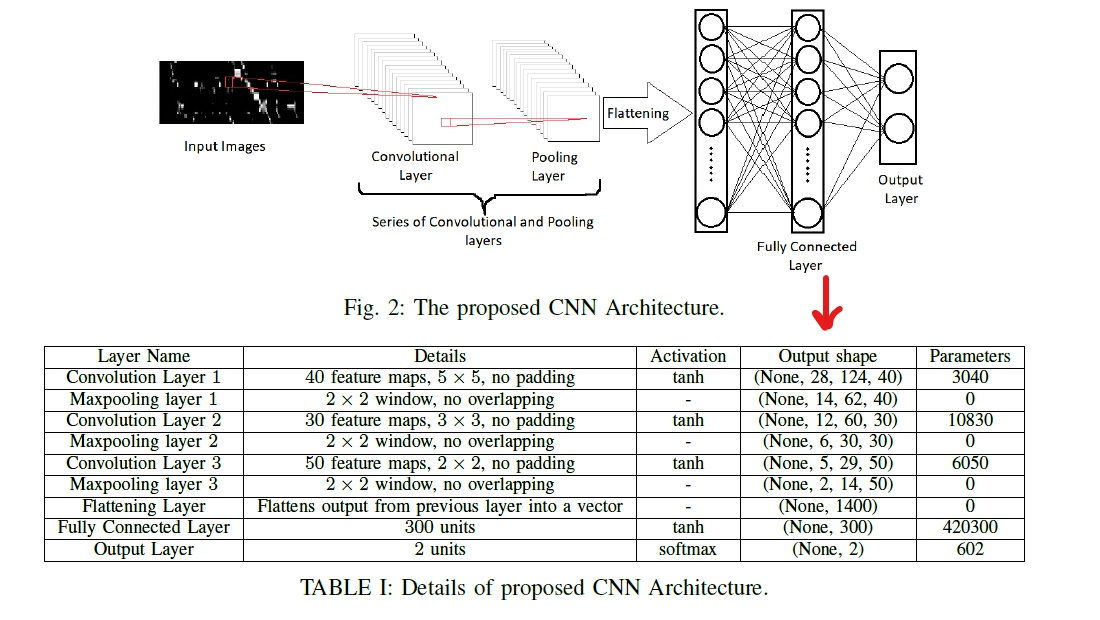

# **Pls check the output shape in pdf and in your model below.**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 28, 40)       3040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 14, 40)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 12, 30)        10830     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 6, 30)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 5, 50)         6050      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 2, 50)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1400)              0

In [ ]:
history = model.fit(train_iterator,
                    steps_per_epoch=60,
                    epochs=65,
                    validation_data = valid_iterator,
                    validation_steps=60)
                    

Epoch 1/65
60/60 [==============================] - 6s 75ms/step - loss: 0.6744 - accuracy: 0.6125 - val_loss: 0.7290 - val_accuracy: 0.5500
Epoch 2/65
60/60 [==============================] - 4s 71ms/step - loss: 0.6147 - accuracy: 0.6665 - val_loss: 0.8212 - val_accuracy: 0.5229
Epoch 3/65
60/60 [==============================] - 4s 73ms/step - loss: 0.5533 - accuracy: 0.7169 - val_loss: 0.8808 - val_accuracy: 0.5135
Epoch 4/65
60/60 [==============================] - 4s 70ms/step - loss: 0.5741 - accuracy: 0.6955 - val_loss: 0.6725 - val_accuracy: 0.6260
Epoch 5/65
60/60 [==============================] - 4s 70ms/step - loss: 0.5396 - accuracy: 0.7118 - val_loss: 0.7510 - val_accuracy: 0.5302
Epoch 6/65
60/60 [==============================] - 4s 70ms/step - loss: 0.5207 - accuracy: 0.7414 - val_loss: 0.7712 - val_accuracy: 0.5646
Epoch 7/65
60/60 [==============================] - 4s 69ms/step - loss: 0.5721 - accuracy: 0.7177 - val_loss: 0.6903 - val_accuracy: 0.6021
Epoch 8/65
60

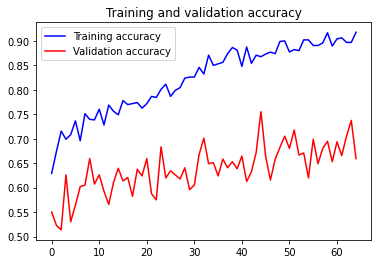

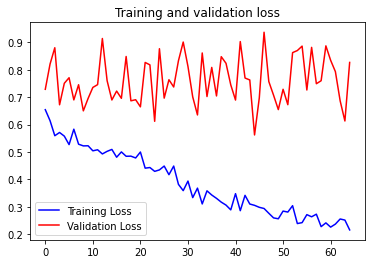

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

model.save('timit_model.h5')

In [ ]:
from keras.models import load_model

model = load_model('timit_model.h5')
model.summary()